In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

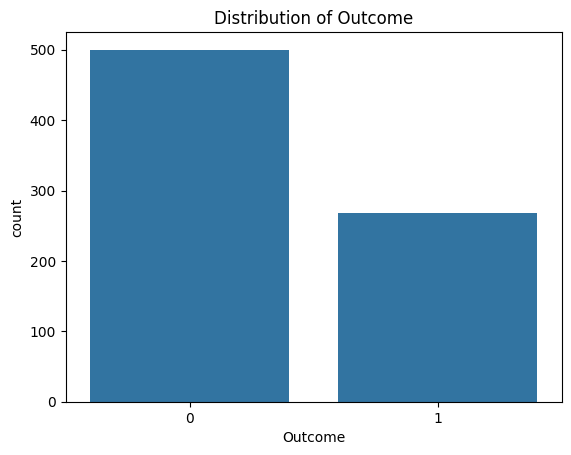

In [ ]:
# Distribution of the Outcome variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

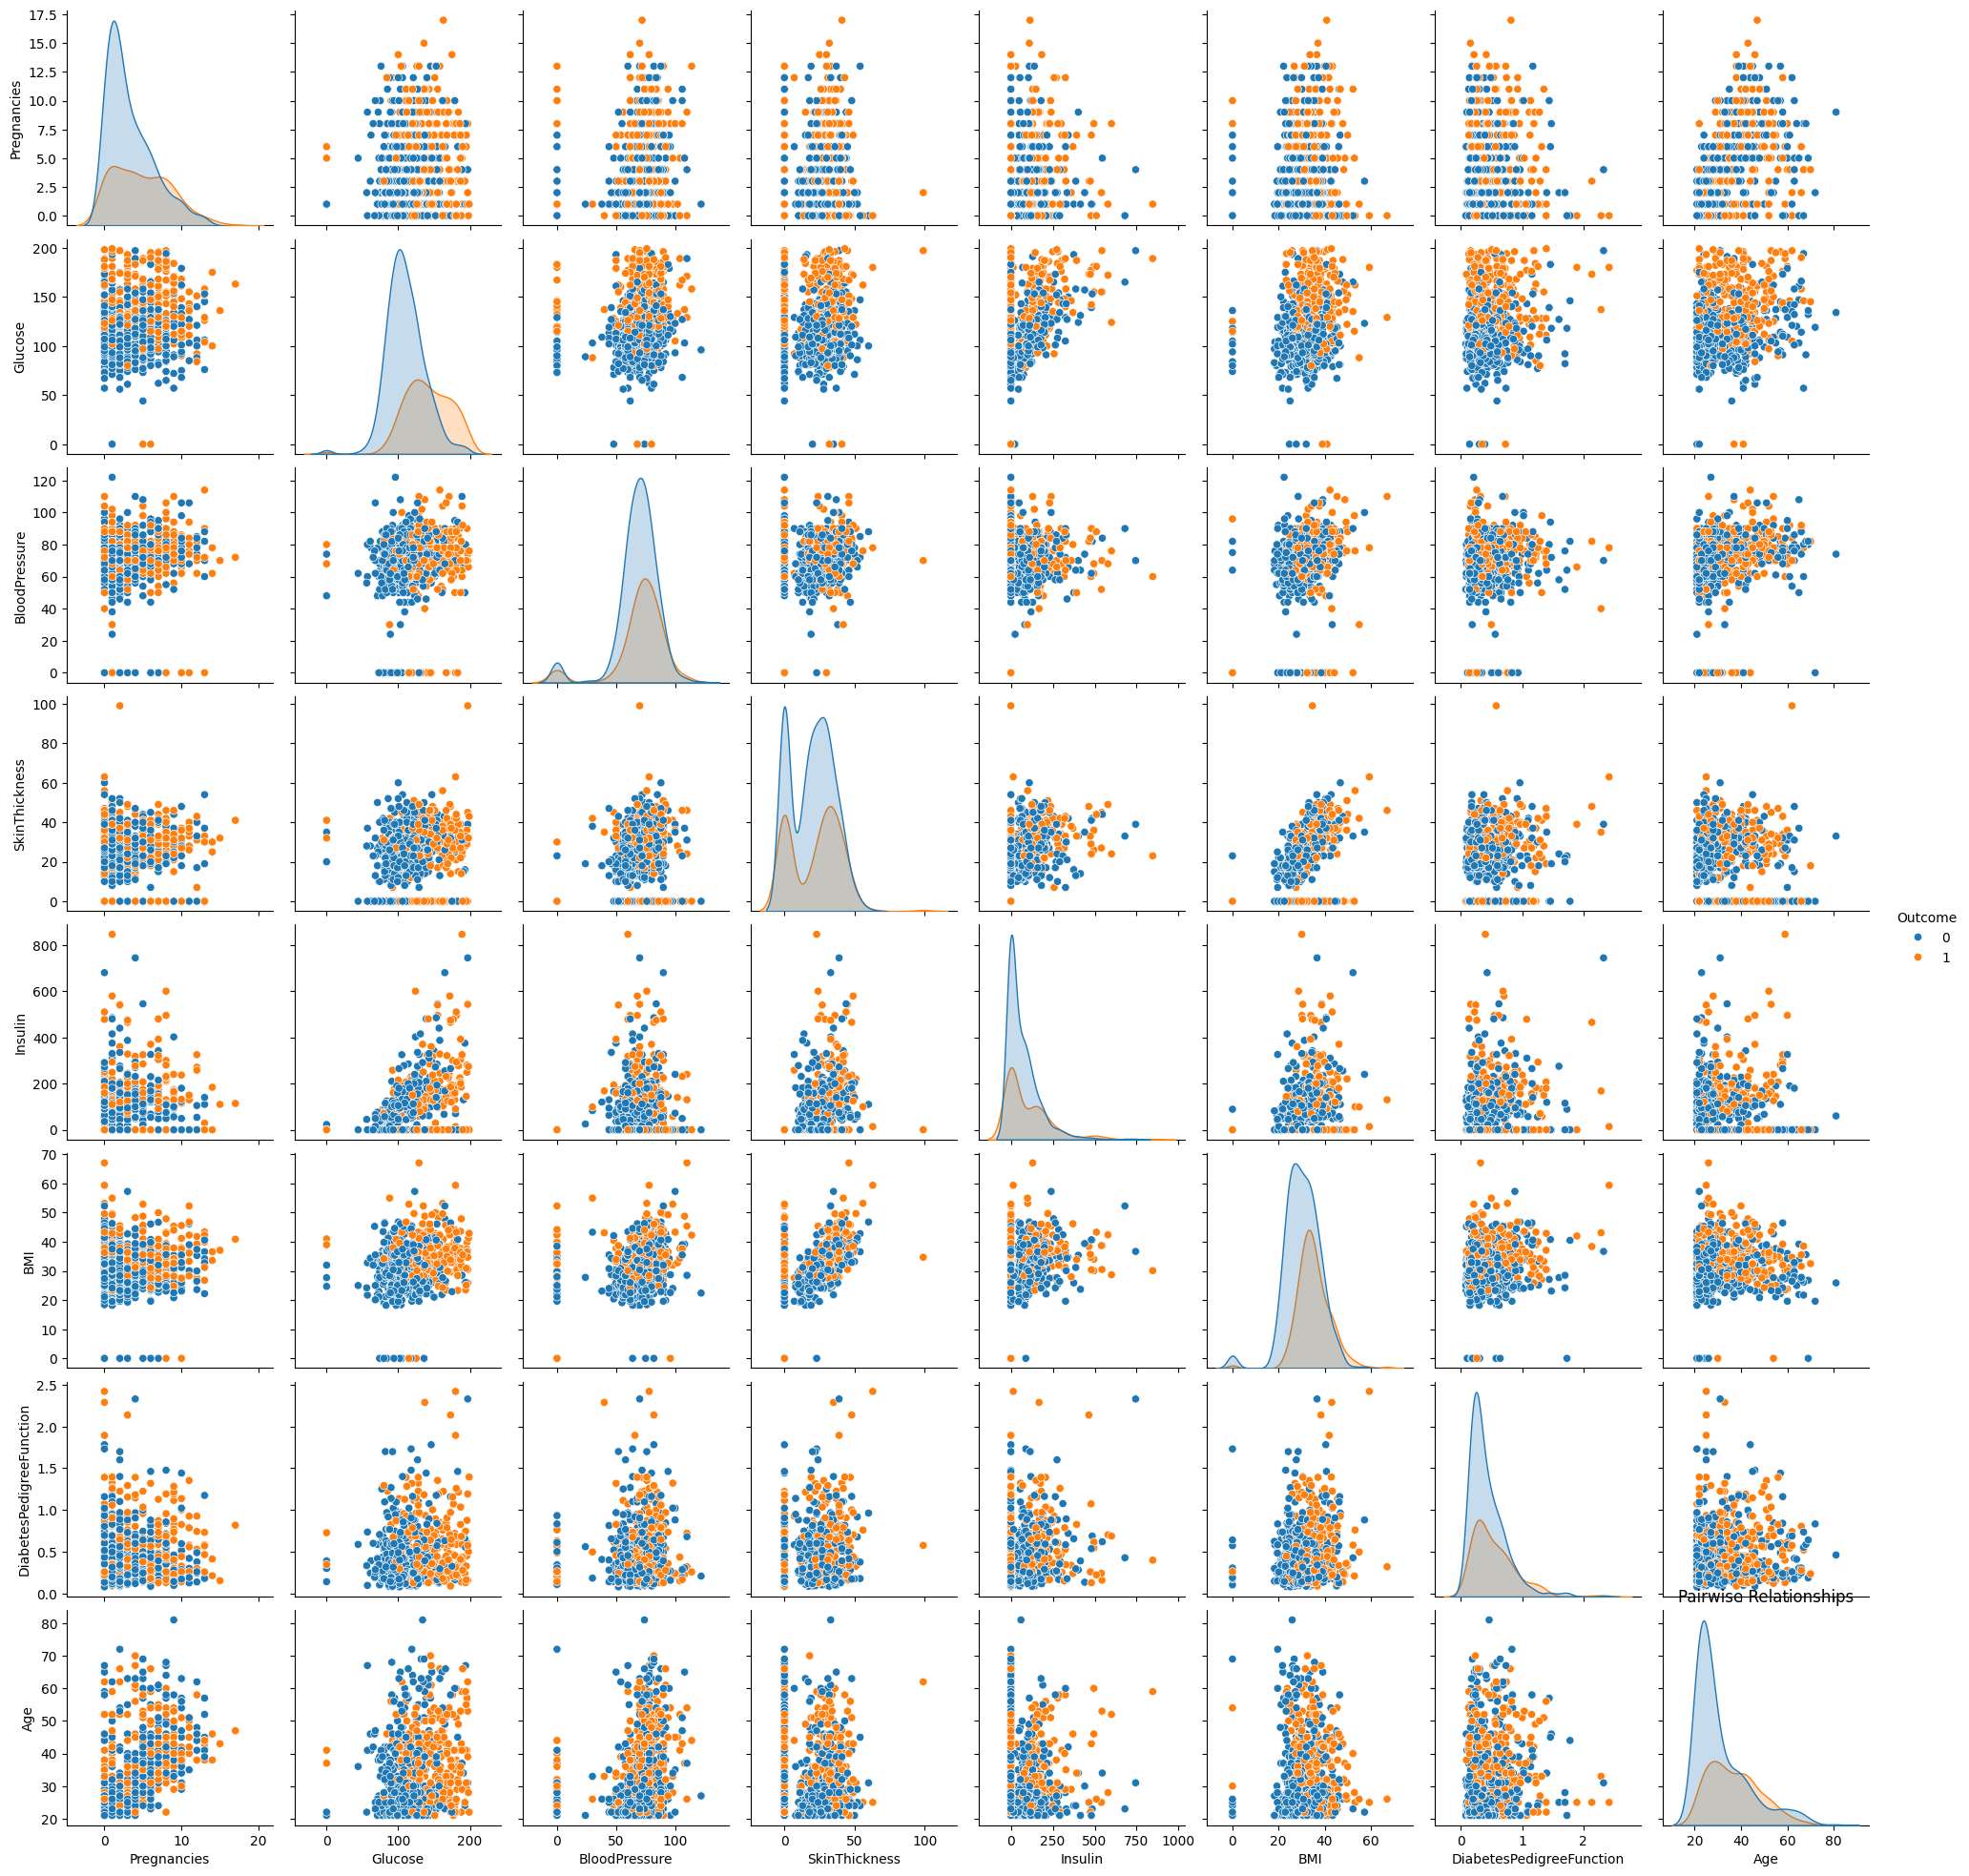

In [ ]:
# Pairwise relationships between numerical variables
sns.pairplot(df, hue='Outcome')
plt.title('Pairwise Relationships')
plt.show()

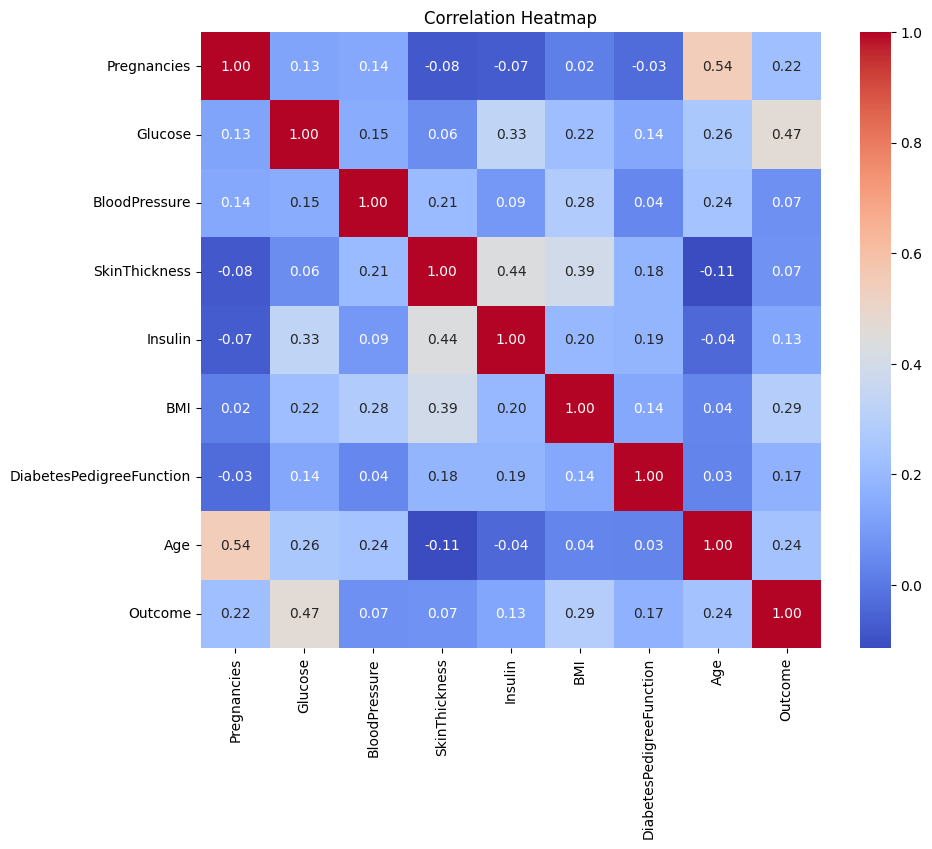

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1. How does the number of pregnancies correlate with the likelihood of diabetes?

<ipython-input-11-b392fa4715db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette=palette_colors)


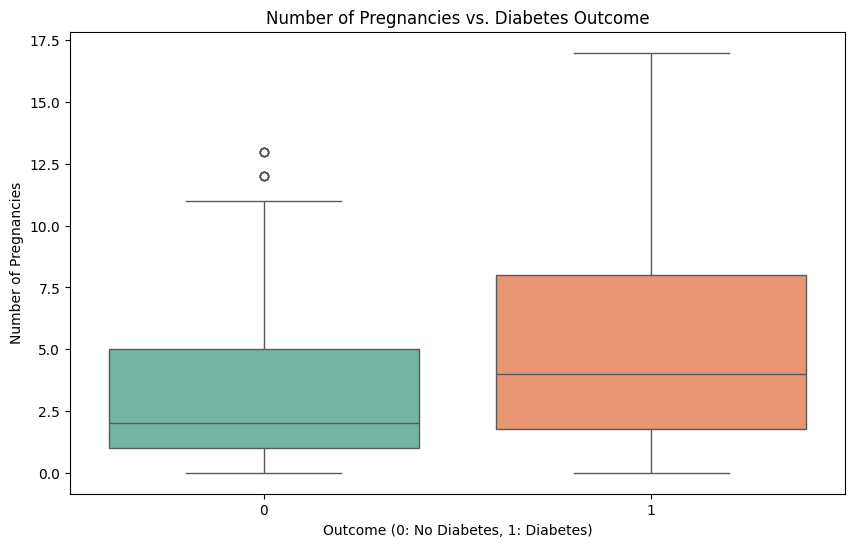

In [ ]:
# Define color palette for the plot
palette_colors = ['#66c2a5', '#fc8d62']

# Plotting the relationship between Pregnancies and Outcome with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df, palette=palette_colors)
plt.title('Number of Pregnancies vs. Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Number of Pregnancies')
plt.show()

2. Is there a relationship between glucose levels and the presence of diabetes?



<ipython-input-14-ae4140c5667c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette=['skyblue', 'salmon'])


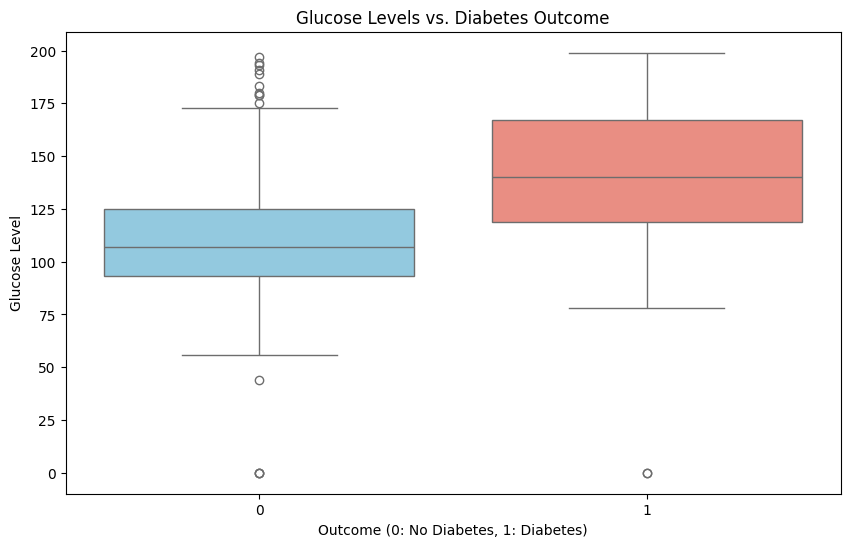

In [ ]:
# Box plot for glucose levels by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette=['skyblue', 'salmon'])
plt.title('Glucose Levels vs. Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Glucose Level')
plt.show()

#If there's a noticeable difference in the median glucose levels between the two groups (diabetic vs. non-diabetic), it suggests a correlation between glucose levels and diabetes likelihood.
#A higher median glucose level for diabetic individuals may indicate a positive correlation.


3. Does a higher BMI tend to be associated with diabetes?

<ipython-input-18-c3602dba9f04>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette=['skyblue', 'salmon'])


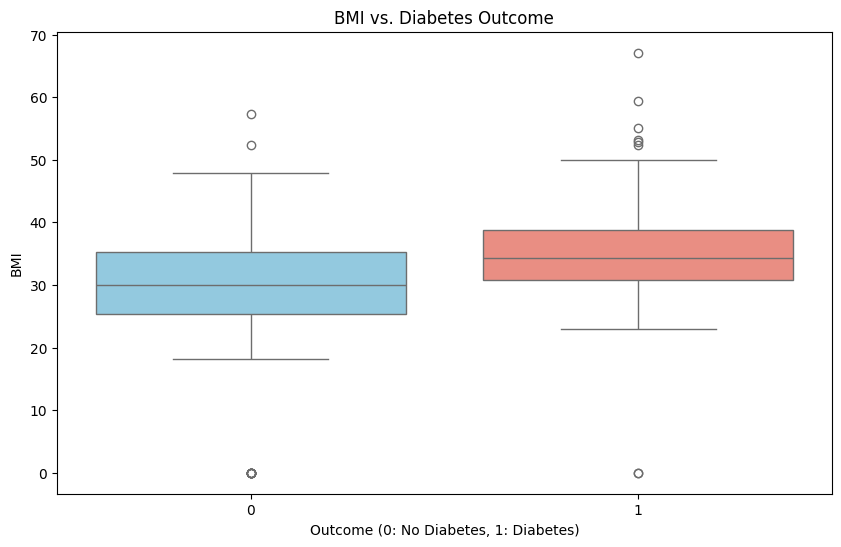

In [ ]:
# Box plot for BMI by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette=['skyblue', 'salmon'])
plt.title('BMI vs. Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('BMI')
plt.show()

#If there's a noticeable difference in the median BMI between the two groups (diabetic vs. non-diabetic), it suggests a potential association between higher BMI and diabetes.
# A higher median BMI for diabetic individuals may indicate a positive correlation between BMI and diabetes likelihood.

4. What is the distribution of ages among patients in the dataset?


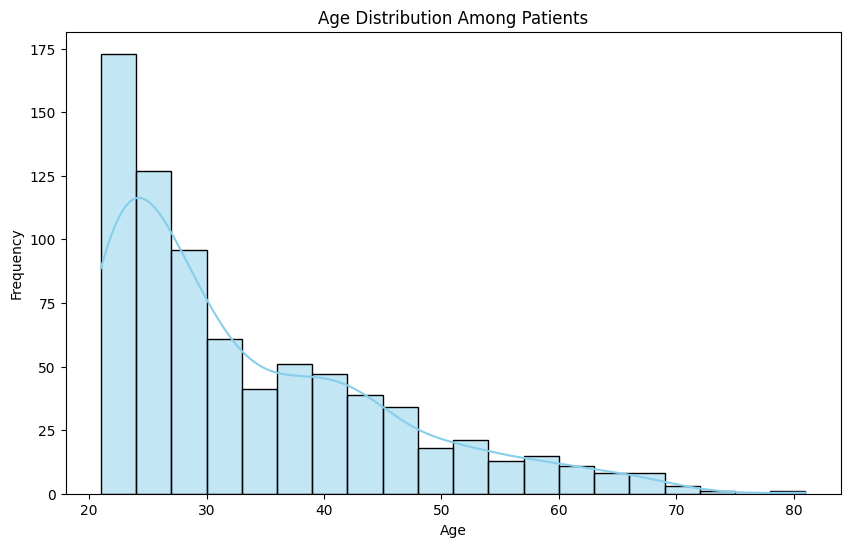

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution Among Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5. Are there any significant correlations between blood pressure and diabetes?

Pearson Correlation Coefficient: 0.0651
P-value: 0.0715


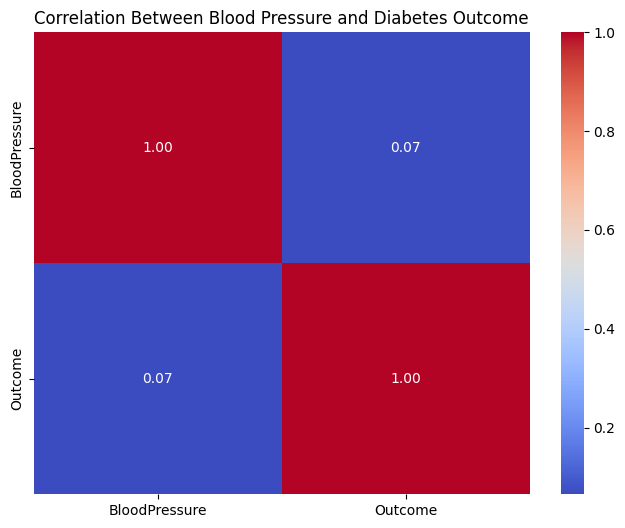

There is a weak positive correlation between blood pressure and diabetes outcome.
However, this correlation is not statistically significant at the 0.05 level.
Therefore, we cannot conclude that there is a meaningful or strong relationship between blood pressure and diabetes outcome in this dataset.


In [ ]:
from scipy.stats import pearsonr
# Calculate the correlation matrix
correlation_matrix = df[['BloodPressure', 'Outcome']].corr()

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['BloodPressure'], df['Outcome'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Blood Pressure and Diabetes Outcome')
plt.show()

print("There is a weak positive correlation between blood pressure and diabetes outcome.")
print("However, this correlation is not statistically significant at the 0.05 level.")
print("Therefore, we cannot conclude that there is a meaningful or strong relationship between blood pressure and diabetes outcome in this dataset.")

6. How does insulin level vary between diabetic and non-diabetic patients?

<ipython-input-26-390ed1823a7b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Diabetic', 'Non-Diabetic'], y=[avg_insulin_diabetic, avg_insulin_non_diabetic], palette=['salmon', 'skyblue'])


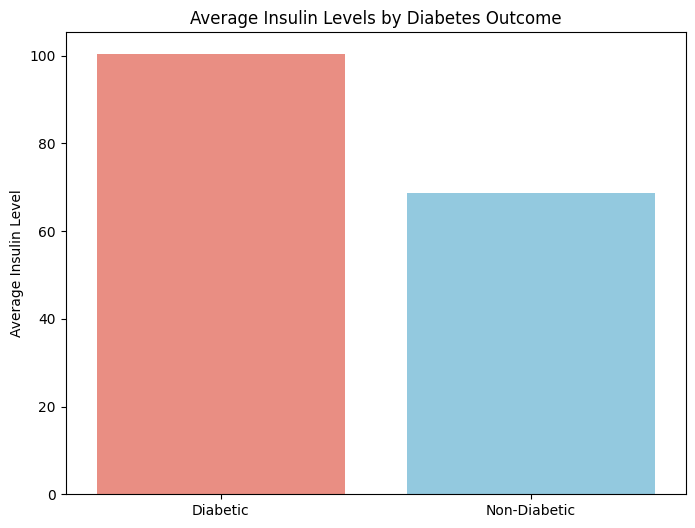

In [ ]:

# Calculate average insulin levels for diabetic and non-diabetic patients
avg_insulin_diabetic = df[df['Outcome'] == 1]['Insulin'].mean()
avg_insulin_non_diabetic = df[df['Outcome'] == 0]['Insulin'].mean()

# Plotting bar plot for average insulin levels
plt.figure(figsize=(8, 6))
sns.barplot(x=['Diabetic', 'Non-Diabetic'], y=[avg_insulin_diabetic, avg_insulin_non_diabetic], palette=['salmon', 'skyblue'])
plt.title('Average Insulin Levels by Diabetes Outcome')
plt.ylabel('Average Insulin Level')
plt.show()

7. Is there a difference in skin thickness between diabetic and non-diabetic individuals?

In [ ]:
from scipy.stats import ttest_ind

# Separate skin thickness for diabetic and non-diabetic individuals
skin_thickness_diabetic = df[df['Outcome'] == 1]['SkinThickness']
skin_thickness_non_diabetic = df[df['Outcome'] == 0]['SkinThickness']

# Perform independent t-test
t_statistic, p_value = ttest_ind(skin_thickness_diabetic, skin_thickness_non_diabetic)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 2.0747
P-value: 0.0383


The statistical significance suggests that skin thickness may be associated with diabetes status.
Individuals with diabetes may have a higher average skin thickness compared to non-diabetic individuals in the dataset.

8. How does the diabetes pedigree function relate to the likelihood of diabetes?

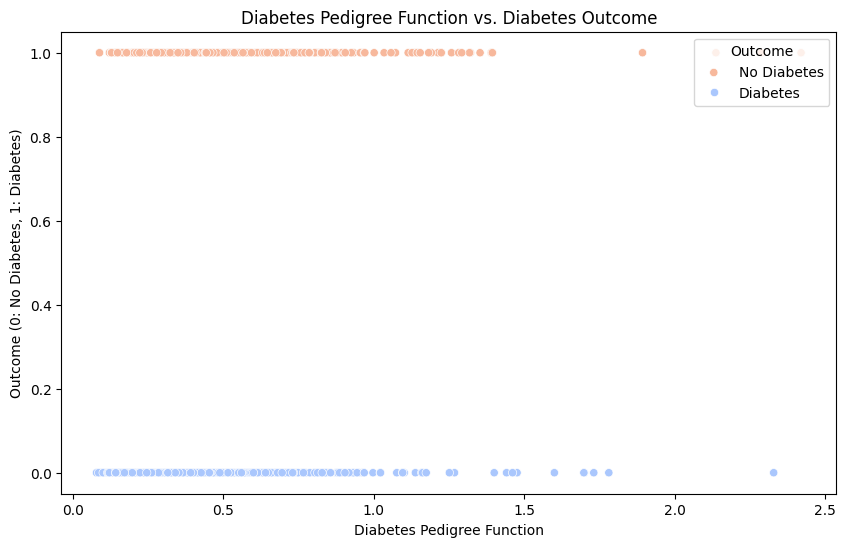

Pearson Correlation Coefficient: 0.1738
P-value: 0.0000


In [ ]:
# Scatter plot for Diabetes Pedigree Function vs. Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiabetesPedigreeFunction', y='Outcome', data=df, hue='Outcome', palette='coolwarm')
plt.title('Diabetes Pedigree Function vs. Diabetes Outcome')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(df['DiabetesPedigreeFunction'], df['Outcome'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")


There is a statistically significant but weak positive correlation between the Diabetes Pedigree Function and the likelihood of diabetes.
This suggests that the Diabetes Pedigree Function may provide some predictive information about an individual's likelihood of developing diabetes, although other factors likely also play a role.

9. Are there any outliers in the dataset that might affect predictive modeling?

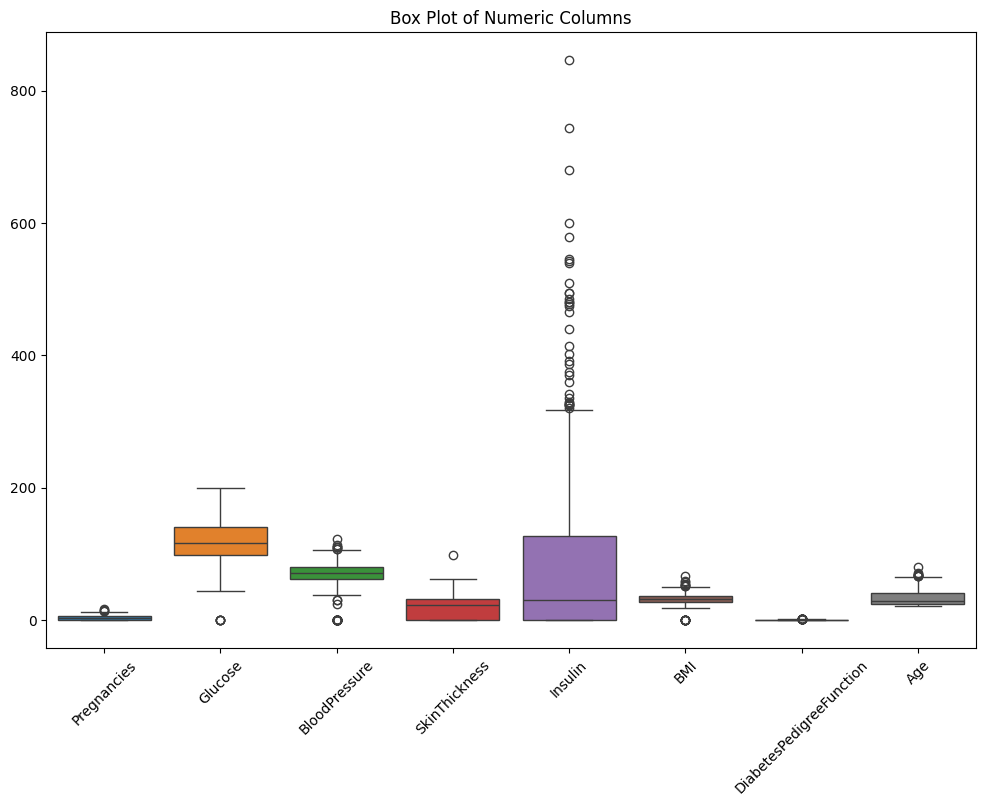

In [ ]:
# Select numeric columns for outlier detection
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create box plots for numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

10. What is the overall proportion of diabetic patients in the dataset

In [ ]:
# Count the number of diabetic patients (Outcome = 1)
diabetic_count = df[df['Outcome'] == 1]['Outcome'].count()

# Calculate the total number of patients in the dataset
total_patients = df['Outcome'].count()

# Calculate the proportion of diabetic patients
proportion_diabetic = diabetic_count / total_patients

print(f"Total Patients: {total_patients}")
print(f"Diabetic Patients: {diabetic_count}")
print(f"Proportion of Diabetic Patients: {proportion_diabetic:.2f}")


Total Patients: 768
Diabetic Patients: 268
Proportion of Diabetic Patients: 0.35


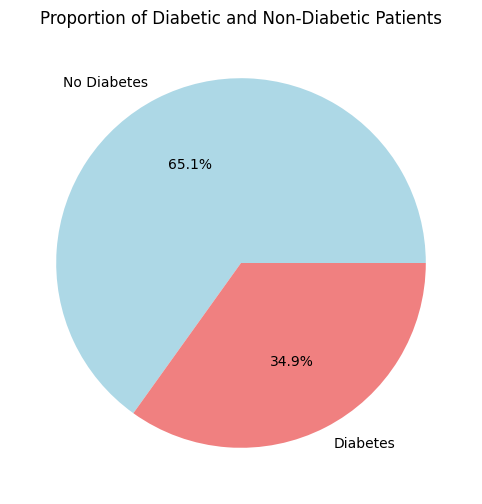

In [ ]:
# Calculate the count of diabetic and non-diabetic patients
diabetic_counts = df['Outcome'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetic_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Diabetic and Non-Diabetic Patients')
plt.show()
